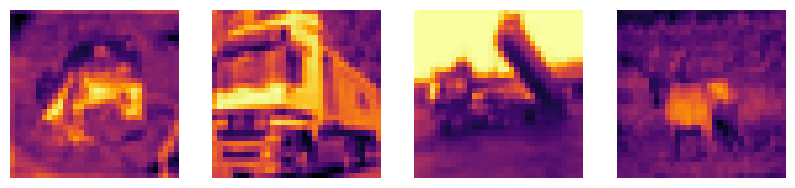

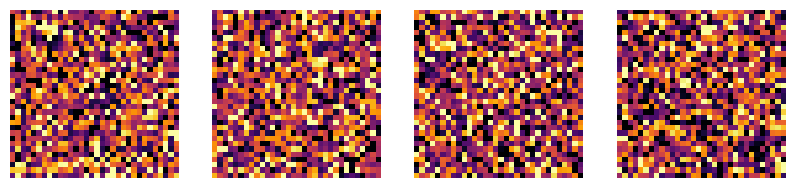

In [38]:
# plot 4 mnist images in the inferno colormap

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


# load mnist data
# mnist = tf.keras.datasets.mnist
# (mnist, _), (_, _) = mnist.load_data()

# load a tf dataset of natural images
(images, _), (_, _) = tf.keras.datasets.cifar10.load_data()
# make grayscale
images = np.mean(images, axis=3)


noise_images = np.random.normal(size=images.shape, loc = images.mean(), scale = 1.5*images.std())
# noise_images = np.random.uniform(size=images.shape, low=0, high=255)

vmin, vmax = np.percentile(images, .5), np.percentile(images, 99.5)

# plot 4 images
fig, axs = plt.subplots(1, 4, figsize=(10, 10))
for i in range(4):
    axs[i].imshow(images[i], cmap='inferno', vmin=vmin, vmax=vmax)
    axs[i].axis('off')


# same thing but for IID gaussian noise images
fig, axs = plt.subplots(1, 4, figsize=(10, 10))
for i in range(4):
    axs[i].imshow(noise_images[i], cmap='inferno', vmin=vmin, vmax=vmax)
    axs[i].axis('off')



[[<matplotlib.axis.YTick at 0x7efd8b1d0370>,
 (0.0, 255.0),
 (0.0, 255.0),
 Text(0, 0.5, 'Intensity at x2 (photons)'),
 Text(0.5, 0, 'Intensity at x1 (photons)')]

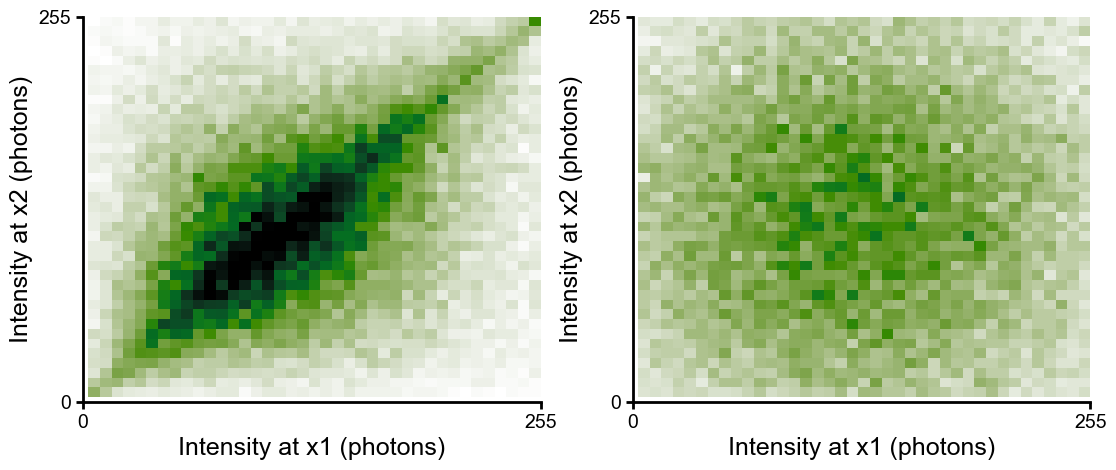

In [53]:
from cleanplots import *

import cmasher as cmr
cmap = cmr.jungle.reversed()



r1 = (14, 10)
r2 = (14, 18)

# get pixels at the two regions
mnist_samples = np.stack([images[:, r1[0], r1[1]],
                            images[:, r2[0], r2[1]]], axis=1)
noise_samples = np.stack([noise_images[:, r1[0], r1[1]],
                            noise_images[:, r2[0], r2[1]]], axis=1)

# plot two 2D hitograms 
bins = np.linspace(vmin, 255, 40)
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
_ = axs[0].hist2d(mnist_samples[:, 0], mnist_samples[:, 1], bins=bins, cmap=cmap, vmin=0, vmax=.00006, density=True) 
_ = axs[1].hist2d(noise_samples[:, 0], noise_samples[:, 1], bins=bins, cmap=cmap, vmin=0, vmax=.00006, density=True)
clear_spines(axs)
axs[0].set(yticks=[0, 255], xticks=[0, 255], ylim=[0, 255], xlim=[0, 255], ylabel='Intensity at x2 (photons)', xlabel='Intensity at x1 (photons)')
axs[1].set(yticks=[0, 255], xticks=[0, 255], ylim=[0, 255], xlim=[0, 255], ylabel='Intensity at x2 (photons)', xlabel='Intensity at x1 (photons)')



